In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
plt.style.reload_library()
plt.style.use(['science','notebook'])
from itertools import combinations
print('done')


done


In [5]:
Arr = pd.read_csv("Grupo_1_termoemision.csv")
Arr1 = pd.read_csv("Grupo1-carro.csv")
Arr2 = pd.read_csv("T vs p.csv")
Arr3 = pd.read_csv("manual.csv")

def solve_quadratic(a, b, c):
    # Calcula el discriminante
    discriminante = b**2 - 4*a*c

    # Comprueba si el discriminante es positivo, negativo o cero
    if discriminante > 0:
        # Dos soluciones reales distintas
        x1 = (-b + math.sqrt(discriminante)) / (2*a)
        x2 = (-b - math.sqrt(discriminante)) / (2*a)
        return x1, x2
    elif discriminante == 0:
        # Una única solución real (raíz doble)
        x = -b / (2*a)
        return x,
    else:
        # No hay soluciones reales
        return None


#T vs ρ

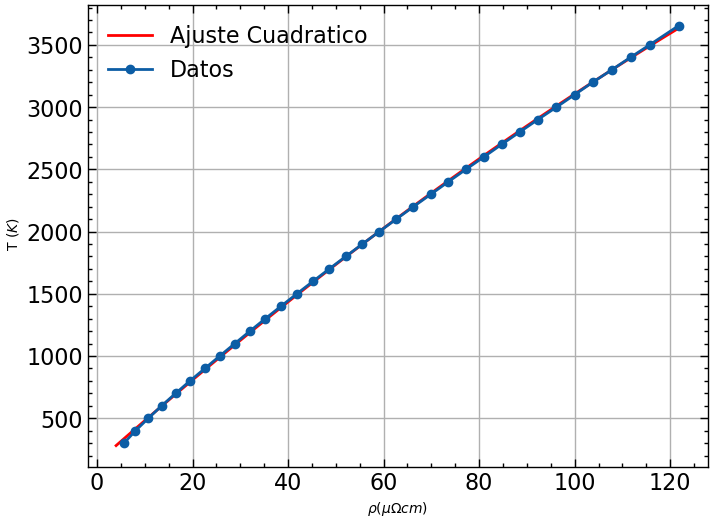

La ecuacion es de tipo: a*x^2+b*x+c, donde a=  -0.0438807522140469  , b=  33.99402632493743 y c=  145.15104796432507


In [20]:
def cuad(x, a, b,c):
    return a*x**2+b*x+c


res, cov = curve_fit(cuad, Arr2["p"], Arr2["T"])



x= np.arange(4,123, 1)


plt.plot(x, cuad(x, res[0], res[1], res[2]), 'r-', label='Ajuste Cuadratico')
plt.plot(Arr2["p"], Arr2["T"], 'o-', label='Datos')


plt.legend()
plt.grid(True)
plt.xlabel(r'$\rho (\mu \Omega cm)$')
plt.ylabel( r' T $(K)$')
plt.savefig("Graf_1_temperatura_vs_resistividad.png", dpi=500)

plt.show()


print("La ecuacion es de tipo: a*x^2+b*x+c, donde a= ", res[0], " , b= ", res[1], "y c= ", res[2])


# R en funcion de I

Bombillo automatico

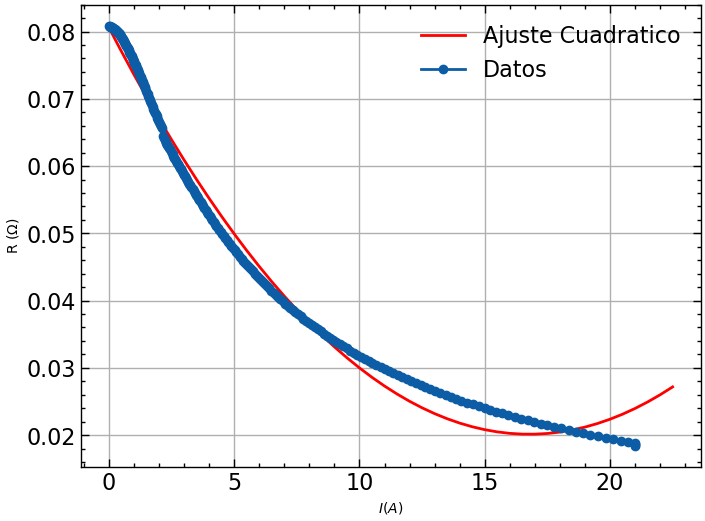

La ecuacion es de tipo: a*x^2+b*x+c, donde a=  0.00021477796408898614  , b=  -0.007206353942095737 y c=  0.0805769165650092
Extrapolando R_0=  0.0805769165650092 $\Omega$


In [17]:
res1, cov1 = curve_fit(cuad, Arr["I"], Arr["R"])



x1= np.arange(0,23, 0.5)


plt.plot(x1, cuad(x1, res1[0], res1[1], res1[2]), 'r-', label='Ajuste Cuadratico')
plt.plot(Arr["I"], Arr["R"], 'o-', label='Datos')


plt.legend()
plt.grid(True)
plt.xlabel(r'$I (A)$')
plt.ylabel( r'R $(\Omega)$')
plt.savefig("Graf_2_Resistencia_vs_intensidad_de_corriente_automaticos.png", dpi=500)

plt.show()

print("La ecuacion es de tipo: a*x^2+b*x+c, donde a= ", res1[0], " , b= ", res1[1], "y c= ", res1[2])
print( "Extrapolando R_0= ", cuad(0, res1[0], res1[1], res1[2]), r'$\Omega$')


Carro

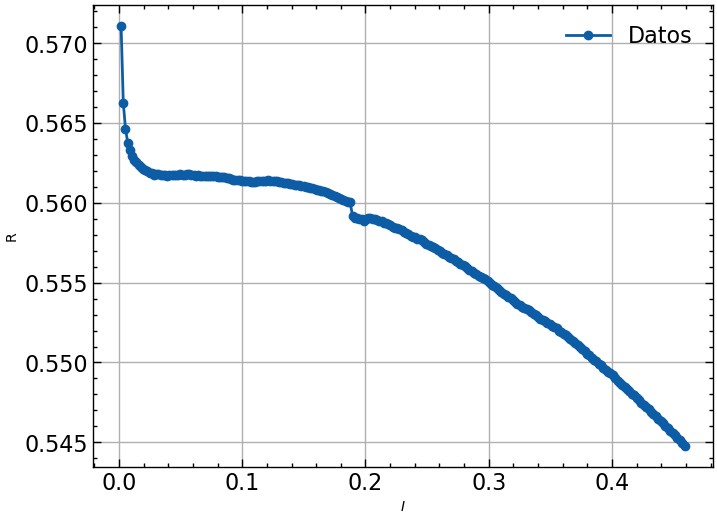

In [18]:
plt.plot(Arr1["I"], Arr1["R"], 'o-', label='Datos')


plt.legend()
plt.grid(True)
plt.xlabel('$I$ ')
plt.ylabel('R')
plt.savefig("Graf_3_Resistencia_vs_intensidad_de_corriente_automaticos_Datos_carro.png", dpi=500)

plt.show()

Manual

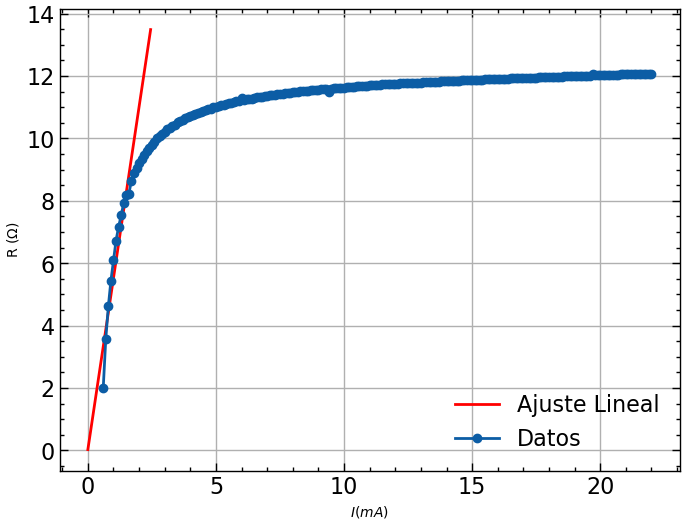

Extrapolando R_0=  0.02857913998242423 $\Omega$


In [19]:
def lin(x, f, g):
    return f*x+g

arx=Arr3["I"]
arx= arx[:12]
ary= Arr3["R"]
ary=ary[:12]

res3, cov3 = curve_fit(lin, arx, ary)

x3= np.arange(0,2.5, 0.05)

plt.plot(x3, lin(x3, res3[0], res3[1]), 'r-', label='Ajuste Lineal')
plt.plot(Arr3["I"], Arr3["R"], 'o-', label='Datos')


plt.legend()
plt.grid(True)
plt.xlabel(r'$I (mA)$')
plt.ylabel( r'R $(\Omega)$')
plt.savefig("Graf_4_Resistencia_vs_intensidad_de_corriente_manuales.png", dpi=500)

plt.show()

print( "Extrapolando R_0= ", lin(0, res3[0], res3[1]), r'$\Omega$')

#L/A

Para el bombillo, proceso automatico

In [10]:
R_0 =cuad(0, res1[0], res1[1], res1[2])
soluciones = solve_quadratic(res[0], res[1], res[2]-298.79)
p_0= soluciones[0]*10**(-6)

L_A= R_0/p_0

print(L_A)

17723.75565019168


Para manual

In [11]:
R_01 = lin(0, res3[0], res3[1])

L_A1= R_01/p_0

print(L_A1)


6286.2878766581225


#T vs R

Bombillo automatico

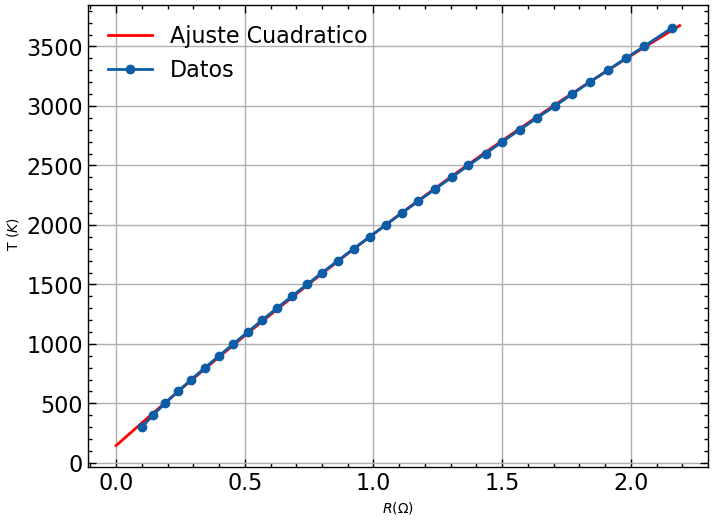

La ecuacion es de tipo: a*x^2+b*x+c, donde a=  -139.68910771661643  , b=  1917.9922597097711 y c=  145.15105273675653


In [21]:
res4, cov4 = curve_fit(cuad, Arr2["p"]*L_A*10**(-6), Arr2["T"])



x4= np.arange(0,2.2,0.01)


plt.plot(x4, cuad(x4, res4[0], res4[1], res4[2]), 'r-', label='Ajuste Cuadratico')
plt.plot(Arr2["p"]*L_A*10**(-6), Arr2["T"], 'o-', label='Datos')


plt.legend()
plt.grid(True)
plt.xlabel(r'$R (\Omega )$')
plt.ylabel( r' T $(K)$')
plt.savefig("Graf_5_Temperatura_vs_Resistencia_automaticos.png", dpi=500)

plt.show()

print("La ecuacion es de tipo: a*x^2+b*x+c, donde a= ", res4[0], " , b= ", res4[1], "y c= ", res4[2])

Bombillo manual

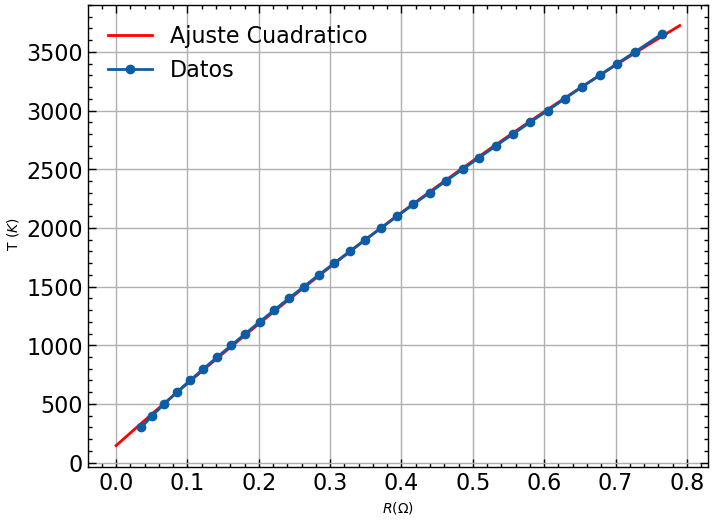

La ecuacion es de tipo: a*x^2+b*x+c, donde a=  -1110.4155198133885  , b=  5407.647067433553 y c=  145.15105062413727


In [22]:
res5, cov5 = curve_fit(cuad, Arr2["p"]*L_A1*10**(-6), Arr2["T"])



x5= np.arange(0,0.8,0.01)


plt.plot(x5, cuad(x5, res5[0], res5[1], res5[2]), 'r-', label='Ajuste Cuadratico')
plt.plot(Arr2["p"]*L_A1*10**(-6), Arr2["T"], 'o-', label='Datos')


plt.legend()
plt.grid(True)
plt.xlabel(r'$R (\Omega )$')
plt.ylabel( r' T $(K)$')
plt.savefig("Graf_7_Temperatura_vs_Resistencia_manual.png", dpi=500)

plt.show()

print("La ecuacion es de tipo: a*x^2+b*x+c, donde a= ", res5[0], " , b= ", res5[1], "y c= ", res5[2])


#T vs R (datos)

segun bombillo automatico

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


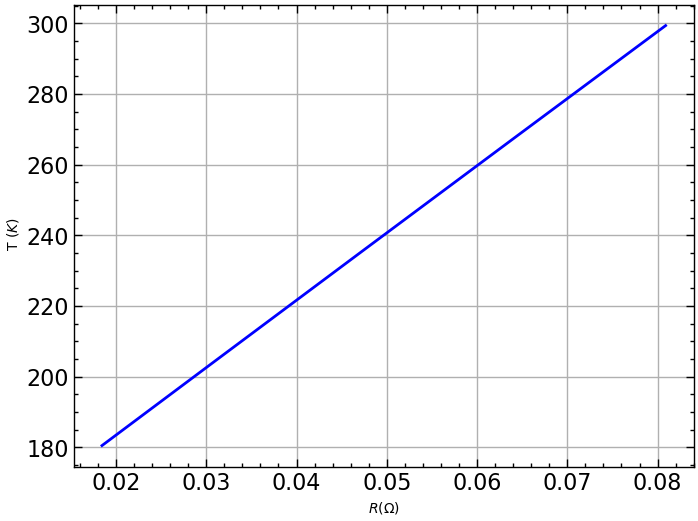

In [23]:
plt.plot(Arr["R"], cuad(Arr["R"], res4[0], res4[1], res4[2]), 'b-')

# plt.xlim(1.7,4)
# plt.ylim(0,5700)
plt.legend()
plt.grid(True)
plt.xlabel(r'$R (\Omega )$')
plt.ylabel( r' T $(K)$')
plt.savefig("Graf_8_Temperatura_vs_Resistencia_otro_metodo_automaticos.png", dpi=500)

plt.show()

manual

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


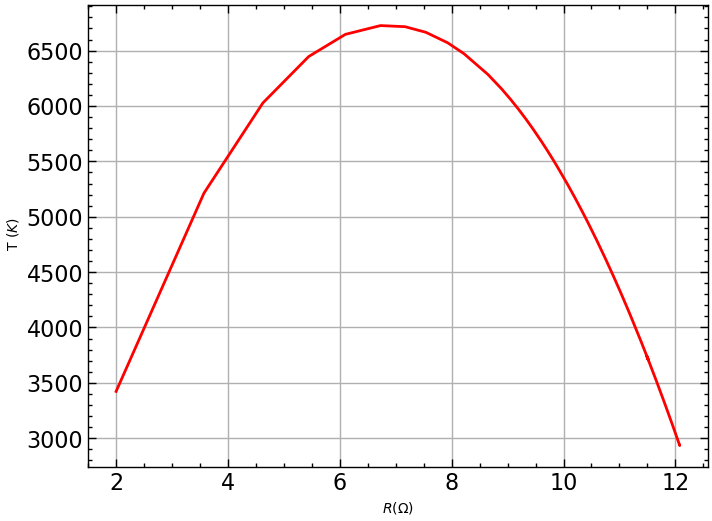

In [24]:
plt.plot(Arr3["R"], cuad(Arr3["R"], res4[0], res4[1], res4[2]), 'r-')

# plt.xlim(0,5)
# plt.ylim(0,5700)
plt.legend()
plt.grid(True)
plt.xlabel(r'$R (\Omega )$')
plt.ylabel( r' T $(K)$')
plt.savefig("Graf_9_Temperatura_vs_Resistencia_otro_metodo_manual.png", dpi=500)

plt.show()